In [1]:
import pandas as pd
import requests
import pprint
from pymongo import MongoClient
from bs4 import BeautifulSoup
import json
import time
from lxml import html
from io import StringIO
from datetime import datetime

# Jake Marisnick

Jake played for the following teams leading up to the 2017 Astros:

- 2013-2014 Miami Marlins (traded to Houston mid 2014)
- 2014-2017 Houston Astros

In [8]:
urls = ['https://www.retrosheet.org/boxesetc/2013/Imarij0020012013.htm',
        'https://www.retrosheet.org/boxesetc/2014/Imarij0020022014.htm',
        'https://www.retrosheet.org/boxesetc/2014/Imarij0020032014.htm',
        'https://www.retrosheet.org/boxesetc/2015/Imarij0020042015.htm',
        'https://www.retrosheet.org/boxesetc/2016/Imarij0020052016.htm']

csv_names = ['csv_from_scrape/marisnick_2013_df.csv',
             'csv_from_scrape/marisnick_2014_1_df.csv',
             'csv_from_scrape/marisnick_2014_2_df.csv',
             'csv_from_scrape/marisnick_2015_df.csv',
             'csv_from_scrape/marisnick_2016_df.csv',
            ]

years = ['2013', '2014', '2014', '2015', '2016']

In [9]:
len(urls) == len(csv_names) == len(years)

True

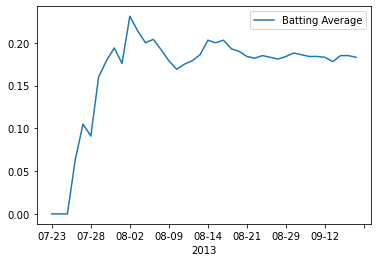

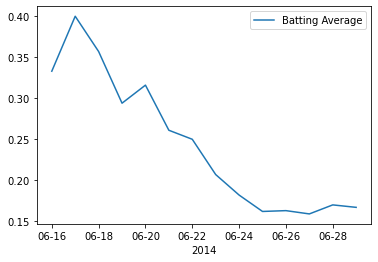

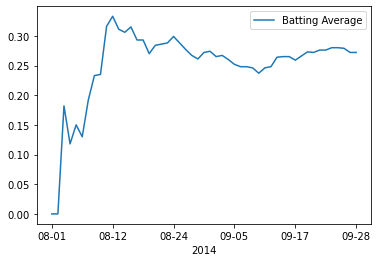

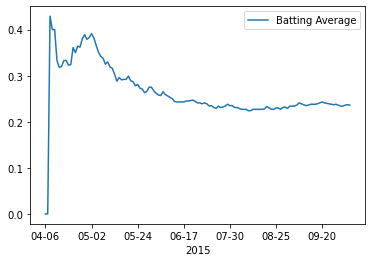

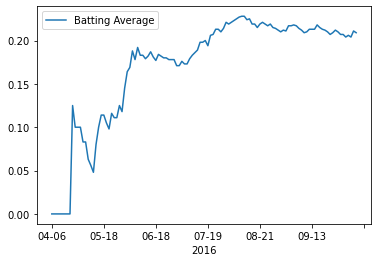

In [10]:
for idx, url in enumerate(urls):
    
    # batting averages

    xpath = "//pre[5]/text()"
    r = requests.get(url)
    page = html.parse(StringIO(r.text))
    batter = page.xpath(xpath)
    
    batter_game_data_only = []
    for a, row in enumerate(batter):
        if a % 2 == 0:
            batter_game_data_only.append(row)
    
    batter_game_data_cleaned = []
    for row in batter_game_data_only[1:]:
        if len(row) > len(batter_game_data_only[2]):
            batter_game_data_cleaned.append(row[0:112])
        else:
            batter_game_data_cleaned.append(row)
        
    batter_averages = [float(row[87:91]) for row in batter_game_data_cleaned]

    # dates played this year

    soup = BeautifulSoup(r.text, 'html.parser')
    
    link_text = []
    for a in soup.find_all('a'):
        link_text.append(a.string)
        
    batter_dates = []
    for i in link_text:
        if years[idx] in i:
            batter_dates.append(i)
            
    batter_dates_cleaned = []
    for date in batter_dates:
        batter_dates_cleaned.append(date.replace(' ', '0'))
        
    batter_dates_final = []
    for date in batter_dates_cleaned:
        batter_dates_final.append(datetime.strftime(datetime.strptime(date, '%m-%d-%Y'), '%m-%d'))
        
    batter_df = pd.DataFrame(batter_averages, batter_dates_final).reset_index()
    batter_df.columns = [years[idx], 'Batting Average']
    batter_df.to_csv(csv_names[idx])
    batter_df.plot(years[idx], 'Batting Average')

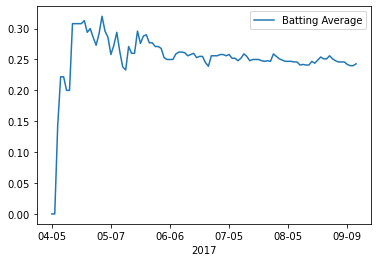

In [16]:
xpath = "//pre[5]/text()"
url = 'https://www.retrosheet.org/boxesetc/2017/Imarij0020062017.htm'
r = requests.get(url)
page = html.parse(StringIO(r.text))
batter = page.xpath(xpath)

batter_game_data_only = []
for a, row in enumerate(batter):
    if a % 2 == 0:
        batter_game_data_only.append(row)

batter_game_data_cleaned = []
for row in batter_game_data_only[3:]:
    if len(row) > len(batter_game_data_only[2]):
        batter_game_data_cleaned.append(row[0:112])
    else:
        batter_game_data_cleaned.append(row)

batter_averages = [float(row[87:91]) for row in batter_game_data_cleaned]


# dates played this year

soup = BeautifulSoup(r.text, 'html.parser')

link_text = []
for a in soup.find_all('a'):
    link_text.append(a.string)
    
batter_dates = []
for i in link_text:
    if '2017' in i:
        batter_dates.append(i)

batter_dates_cleaned = []
for date in batter_dates[2:]:
    batter_dates_cleaned.append(date.replace(' ', '0'))

batter_dates_final = []
for date in batter_dates_cleaned:
    batter_dates_final.append(datetime.strftime(datetime.strptime(date, '%m-%d-%Y'), '%m-%d'))
    
batter_df = pd.DataFrame(batter_averages, batter_dates_final).reset_index()
batter_df.columns = ['2017', 'Batting Average']
batter_df.to_csv('csv_from_scrape/marisnick_2017_df.csv')
batter_df.plot('2017', 'Batting Average')